In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [39]:
# df = pd.read_csv("Student_Performance.csv", nrows = 100)
df = pd.read_csv("Student_Performance.csv")


print(df.head())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [40]:
x_1 = df["Hours Studied"]
x_2 = df["Previous Scores"]
x_3 = df["Extracurricular Activities"].replace({"Yes": 1, "No": 0})
x_4 = df["Sleep Hours"]
x_5 = df["Sample Question Papers Practiced"]

# X_train = [x_1, x_2, x_3, x_4, x_5]
X_train = np.array([x_1, x_2, x_3, x_4, x_5])

y_train = df["Performance Index"]

w = [5 for i in range(10000)]
b = 10

C:\Users\sashk\AppData\Local\Temp\ipykernel_41480\3330621573.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_3 = df["Extracurricular Activities"].replace({"Yes": 1, "No": 0})


In [41]:
def prediction(x, w, b):

    n = x.shape[0]

    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p += p_i

    p += b

    return p
    

In [42]:
def predict_single_loop(x, w, b):
    p = np.dot(x, w) + b

    return p

In [43]:
def min_max_scaling(X):
    """
    min_val: An array of shape (X.shape[1]) where each element is the minimum value found for each feature column across m examples of X.

    max_val - Same principle as min_val but for maximum values.

    X - min_val: Subtract the values of min_val from each m of X using broadcasting.
    In other words, for each row m in X, substract min_val from every m element-wise.


    max_val - min_val: The range of elements. It defines how far apart the smallest and the largest values are.
    To calculate it, every feature of min_val is subtracted from every feature of max_val (Element-wise operation).

    (X - min_val) / (max_val - min_val): 
        For every m of X, subtract min_val from m using broadcasting.
        Divide each n of X[m] by (max_val - min_val)[n] using broadcasting.
    """
    min_val = X.min(axis=0)  # Minimum per feature
    max_val = X.max(axis=0)  # Maximum per feature
    
    X_scaled = (X - min_val) / (max_val - min_val)

    # print(f"Min value: {min_val}")
    # print(f"Max value: {max_val}")

    # print(f"X - min_val: {X - min_val}")
    # print(f"max_val - min_val: {max_val - min_val}")

    return X_scaled

In [44]:
def compute_cost(X, y, w, b):
    m = len(X)
    n = len(X[0])
    
    cost = 0
    
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i]) ** 2

    return cost / (2 * m)
        

In [45]:
print(compute_cost(X_train, y_train, w, b))

1227836949591.8


In [72]:
def compute_gradient(X, y, w, b):
    m, n = X.shape

    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        err = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i][j]
        dj_db += err

    dj_dw = dj_dw / m
    dj_db = dj_db / m
            

    return dj_dw, dj_db

In [71]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w_history = []

    w = w_in.copy()
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = cost_function(X, y, w, b)
        J_history.append(cost)

        if i % 100 == 0:
            w_history.append(w)


    return w, b, J_history, w_history
    

In [ ]:
w = [1 in range(10000)]
# b = 50
w = np.zeros_like(w)
b = 0.
X_train = min_max_scaling(X_train)
iterations = 10000
alpha = 0.0005
# alpha = 0.00001
w_final, b_final, J_hist, _= gradient_descent(X_train, y_train, w, b, compute_cost, compute_gradient, alpha, iterations)

print(w_final, b_final)

[-0.13720973 -0.07817852  0.0581322  ... -0.05483744  0.22562968
 -0.06050767] 28.32116157836448


In [62]:
print(compute_cost(X_train, y_train, w_final, b_final))

21.216967161140026


In [81]:
m = X_train.shape[0]
for i in range(m):
    # print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")
    print(f"prediction: {predict_single_loop(X_train[i], w_final, b_final)}, target value: {y_train[i]}")

prediction: 91.42282039533131, target value: 91.0
prediction: 64.90288533677995, target value: 65.0
prediction: 30.46302271420214, target value: 45.0
prediction: 36.810346345169066, target value: 36.0
prediction: 66.03306750592384, target value: 66.0


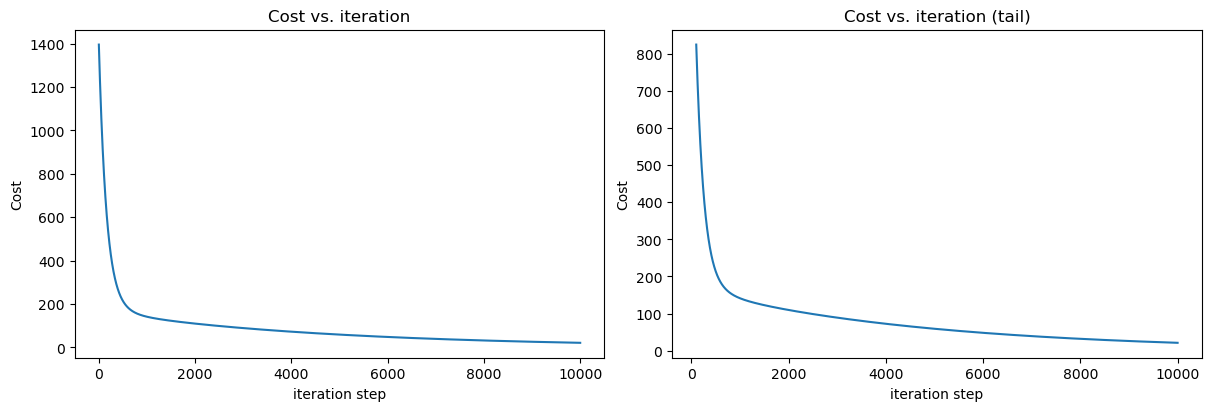

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()